# Impact of different Cardiovascular Diseases in Germany

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tueplots import bundles

In [2]:
DATA_PATH = "../data/raw/"
OUTPUT_PATH = "output/" # if you want to save the plots

os.makedirs(OUTPUT_PATH, exist_ok=True)

## Load data

In [3]:
cvd_data = pd.read_csv(DATA_PATH + "GBD_CVD_specific.csv")
cvd_data

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Number,1990,447.993749,552.112206,367.107295
1,Deaths,Thailand,Female,All ages,Other cardiovascular and circulatory diseases,Number,1990,393.834289,498.821302,330.140013
2,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Percent,1990,0.002523,0.003020,0.002138
3,Deaths,Thailand,Female,All ages,Other cardiovascular and circulatory diseases,Percent,1990,0.003120,0.003929,0.002691
4,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Rate,1990,1.588415,1.957579,1.301622
...,...,...,...,...,...,...,...,...,...,...
403915,Deaths,Rwanda,Female,All ages,Non-rheumatic valvular heart disease,Number,2000,29.931091,45.978770,17.327946
403916,Deaths,Rwanda,Male,All ages,Non-rheumatic valvular heart disease,Percent,2000,0.000410,0.000615,0.000274
403917,Deaths,Rwanda,Female,All ages,Non-rheumatic valvular heart disease,Percent,2000,0.000559,0.000836,0.000319
403918,Deaths,Rwanda,Male,All ages,Non-rheumatic valvular heart disease,Rate,2000,0.593093,0.899302,0.398610


## Preprocess data
* Keep only German data
* Keep only death rate
* Sum male and female numbers

In [4]:
ONLY_GERMANY = True
new_filtered_data = cvd_data[(cvd_data['metric'] == 'Rate') & (cvd_data['measure'] == 'Deaths')]
if ONLY_GERMANY:
    new_filtered_data = new_filtered_data[new_filtered_data['location'] == 'Germany']
new_impact_data = new_filtered_data.groupby('cause')['val'].sum().sort_values(ascending=False)

## Create sns color palette in tueplots colorscheme

In [5]:
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap

# Create a linear segmented colormap
custom_cmap = LinearSegmentedColormap.from_list("tue_red_blue", [rgb.tue_red, rgb.tue_blue])
n_colors = 11  # You can adjust the number of colors in the palette
custom_colors = [custom_cmap(i / n_colors) for i in range(n_colors)]
tue_RB_palette = sns.color_palette(custom_colors)

## Make a barplot

C:\Users\vojsy\AppData\Local\Temp\ipykernel_14020\370270171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=new_impact_data.values, y=new_impact_data.index, palette=tue_RB_palette, orient='h')


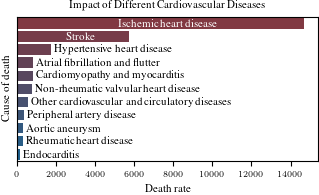

In [6]:
# Set icml2022 style
plt.rcParams.update(bundles.icml2022(column="half", ncols=2, nrows=1))
plt.rcParams["figure.figsize"] = (plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*2)

# create barplot
barplot = sns.barplot(x=new_impact_data.values, y=new_impact_data.index, palette=tue_RB_palette, orient='h')

# Remove the y-axis labels
plt.yticks([])

# Get the two largest cause indices for conditional labeling
top_two_indices = new_impact_data.nlargest(2).index

# Customize y-axis labels, placing them inside the bars for the top two causes and higher outside for the others
for i, bar in enumerate(barplot.patches):
    cause = new_impact_data.index[i]
    label_y_pos = bar.get_y() + bar.get_height() / 2

    if cause in top_two_indices:
        # Label inside the bar for top two causes
        label_x_pos = bar.get_width()*0.7 
        label_color = 'white'
        ha_alignment = 'right'
    else:
        # Label outside the bar for other causes, to the right of the bar
        label_x_pos = bar.get_width() + (max(new_impact_data.values) * 0.01)  # Slightly outside the bar
        label_color = 'black'
        ha_alignment = 'left'

    plt.text(label_x_pos, label_y_pos,
             cause,
             va='center',
             ha=ha_alignment,
             color=label_color)
    
# Set the title and axis labels
plt.title('Impact of Different Cardiovascular Diseases')
plt.xlabel('Death rate')
plt.ylabel('Cause of death')

plt.savefig("output/fig_ImpactOfDifferentCVDs.pdf")
plt.show()